# Performing the Linear Regression of ages, weeks and the indicators of mental depression by state against its frequency



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# import and subset mental health data

In [2]:
#reading in the csv data for mental health between april 23 to July 21
df=pd.read_csv("data_resources/2020IndicatorsofDepression.csv")
df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,July 16 - July 21,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,July 16 - July 21,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,July 16 - July 21,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,July 16 - July 21,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1


In [3]:
#checking through the group and subgroup columns
df.Group.unique()
df.Subgroup.unique()

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic white, single race',
       'Non-Hispanic black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [4]:
#creating the age dataframe
ages_df = df.loc[df["Subgroup"] == '18 - 29 years']
ages_df=ages_df.append(df.loc[df["Subgroup"]=='30 - 39 years'])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="40 - 49 years"])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="50 - 59 years"])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="60 - 69 years"])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="70 - 79 years"])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="80 years and above"])
ages_df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
71,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,40.2,38.1,42.4,38.1 - 42.4,NaN
141,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,18 - 29 years,1,Apr 23 - May 5,46.8,44.3,49.3,44.3 - 49.3,NaN
211,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,2,May 7 - May 12,36.2,32.2,40.2,32.2 - 40.2,NaN
281,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,2,May 7 - May 12,42.0,38.3,45.7,38.3 - 45.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2177,Symptoms of Anxiety Disorder,By Age,United States,80 years and above,11,July 9 - July 14,15.6,11.9,20.0,11.9 - 20.0,NaN
2247,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,80 years and above,11,July 9 - July 14,18.9,15.3,23.0,15.3 - 23.0,NaN
2317,Symptoms of Depressive Disorder,By Age,United States,80 years and above,12,July 16 - July 21,12.6,9.7,15.9,9.7 - 15.9,NaN
2387,Symptoms of Anxiety Disorder,By Age,United States,80 years and above,12,July 16 - July 21,13.4,10.6,16.7,10.6 - 16.7,NaN


In [5]:
df2 = df.loc[(df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')&
             (df['Group']=='By Age') &
             (df['Subgroup']=='18 - 29 years') &
             (df['Value'])]
df2["Value"].median()
df3 = df.loc[(df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')& 
             (df['Group']=='By Age') & 
             (df['Subgroup']=='29 - 39  years') &
             (df['Value'])]
df3["Value"].median()


nan

In [6]:
#Plotting the bar graph of Subgroup(Ages) against the frequency of mental illness
#age_graph=pd.DataFrame("Subgroup","Value")


# age_graph=df["Subgroup","Value"]
# age_graph

# df.plot(kind="bar",figsize=(10,5))
# plt.title("Bar plot of mice treatments")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Data Point")

In [7]:
#picking out the national estimate from the group column 
#then creating a data frame that consists of just indicators of mental illness, week label and values
nat_df=df.loc[df["Group"]=="National Estimate"]
nat_df
new_nat_df=nat_df[["Indicator","Week Label","Value"]]
new_nat_df.head()

,Indicator,Week Label,Value
0,Symptoms of Depressive Disorder,Apr 23 - May 5,23.5
70,Symptoms of Anxiety Disorder,Apr 23 - May 5,30.8
140,Symptoms of Anxiety Disorder or Depressive Dis...,Apr 23 - May 5,35.9
210,Symptoms of Depressive Disorder,May 7 - May 12,24.1
280,Symptoms of Anxiety Disorder,May 7 - May 12,30.0


In [8]:
#creating a dataframe with indicator"Symptoms of Anxiety Disorder or Depressive Disorder"
new_nat_df2 = new_nat_df.loc[(new_nat_df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')&
                     (new_nat_df['Week Label']) 
                     & (new_nat_df['Value'])]
new_nat_df2

,Indicator,Week Label,Value
140,Symptoms of Anxiety Disorder or Depressive Dis...,Apr 23 - May 5,35.9
350,Symptoms of Anxiety Disorder or Depressive Dis...,May 7 - May 12,34.4
560,Symptoms of Anxiety Disorder or Depressive Dis...,May 14 - May 19,33.9
770,Symptoms of Anxiety Disorder or Depressive Dis...,May 21 - May 26,34.3
980,Symptoms of Anxiety Disorder or Depressive Dis...,May 28 - June 2,35.5
1190,Symptoms of Anxiety Disorder or Depressive Dis...,June 4 - June 9,36.1
1400,Symptoms of Anxiety Disorder or Depressive Dis...,June 11 - June 16,36.0
1610,Symptoms of Anxiety Disorder or Depressive Dis...,June 18 - June 23,36.1
1820,Symptoms of Anxiety Disorder or Depressive Dis...,June 25 - June 30,37.8
2030,Symptoms of Anxiety Disorder or Depressive Dis...,July 2 - July 7,39.0


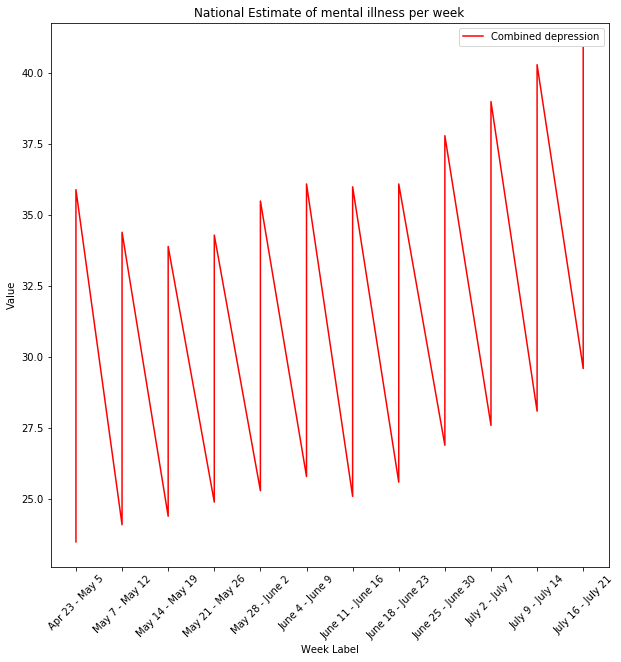

In [16]:
#Plotting the line graph of national estimate against week
y_axis = new_nat_df["Value"]
x_axis = new_nat_df["Week Label"]
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_axis, y_axis, color="red", label="Combined depression")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title('National Estimate of mental illness per week')
plt.xlabel('Week Label')
plt.ylabel('Value')
plt.legend()
plt.show()

# Finding the correlation and relationship between mental health issue and the surge in covid cases by week

The r-squared is: 0.07671689417201501


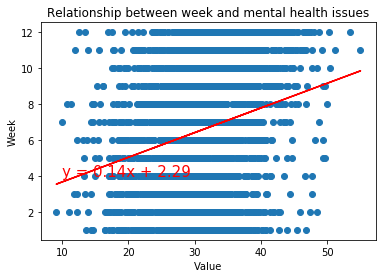

There is a strong positive correlation mental health issues and increase in week


In [11]:
st.linregress(df["Value"],df["Week"])

x_values = df["Value"]
y_values = df["Week"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")
plt.xlabel('Value')
plt.ylabel('Week')
plt.title("Relationship between week and mental health issues")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a strong positive correlation mental health issues and increase in week")

In [12]:
# us_state_abbrev["Georgia"] # "GA"
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [13]:
# Convert string column to numeric
df["Indicator_Num"]=df["Indicator"].mask(df["Indicator"]=="Symptoms of Depressive Disorder",1) 
df["Indicator_Num"]=df["Indicator_Num"].mask(df["Indicator_Num"]=="Symptoms of Anxiety Disorder",2)
df["Indicator_Num"]=df["Indicator_Num"].mask(df["Indicator_Num"]=="Symptoms of Anxiety Disorder or Depressive Disorder",3)
df["Indicator_Num"].unique()

array([1, 2, 3], dtype=object)

In [ ]:
df.head()

In [ ]:
group_df=df[["Group"]]
df.Group.unique()

In [ ]:
df.Subgroup.unique()

In [ ]:
#df.Subgroup.unique()
# ages_df = df.loc[(df["Subgroup"] == '18 - 29 years') & (df["Subgroup"] == '30 - 39 years')]
# ages_df
ages_df = df.loc[df["Subgroup"] == '18 - 29 years']
ages_df=ages_df.append(df.loc[df["Subgroup"]=='30 - 39 years'])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="40 - 49 years"])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="50 - 59 years"])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="60 - 69 years"])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="70 - 79 years"])
ages_df=ages_df.append(df.loc[df["Subgroup"]=="80 years and above"])
ages_df


In [ ]:
# st.linregress(ages_df["Value"],ages_df["Subgroup"])

# x_values = ages_df["Value"]
# y_values = ages_df["Subgroup"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(f"The r-squared is: {rvalue**2}")
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# # plt.annotate(line_eq,(10,40),fontsize=15,color="red")
# plt.xlabel('Value')
# plt.ylabel('Subgroup')
# # plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression(08/09/2020)")
# plt.show()
# #plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
# #%matplotlib inline
# #print(f"There is a weak positive correlation between people suffering from either mental health generally and covid_cases in the state")



In [ ]:
# plt.scatter(age_df.iloc[:,6],age_df.iloc[:,3])
# plt.xlabel("Value")
# plt.ylabel("Subgroup")
# plt.show()


In [ ]:
state_df = df.loc[(df['Group']=="By State") & (df['Week'] == 12)]
print(len(state_df))
state_df.head()

In [ ]:
new_col = []
for state in state_df["State"]:
    new_col.append(us_state_abbrev[state])
state_df["State"] = new_col
state_df.head()

# import and subset covid data

In [ ]:
covid_df=pd.read_csv("data_resources/Covid_Data.csv")
covid_df
latest_covid_df = covid_df.loc[(covid_df["date"]>=20200716) & (covid_df["date"]<=20200721)]
print(len(latest_covid_df))
latest_covid_df.head()

In [ ]:
latest_covid_df.tail()

# merge state_df and latest_covid_df

In [ ]:
print(state_df.columns)
print(latest_covid_df.columns)

In [ ]:
renamed_state_df=state_df.rename(columns={"State":"state"},inplace= False)
renamed_state_df.head()

In [ ]:
state_df
latest_covid_df
merged_data=pd.merge(renamed_state_df[["Indicator","Group","state","Week Label","Value"]], 
                     latest_covid_df[["date","state","positive"]],
                     how ="left",
                     on=['state'])
merged_data

In [ ]:
depressive_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Depressive Disorder"]
depressive_df.head()

In [ ]:
anxiety_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Anxiety Disorder"]
anxiety_df.head()

In [ ]:
dep_anx_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder"]
dep_anx_df.head()

In [ ]:
st.linregress(depressive_df["Value"],depressive_df["positive"])

x_values = depressive_df["Value"]
y_values = depressive_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5000),fontsize=15,color="red")
plt.xlabel('Value')
plt.ylabel("covid cases")
plt.title(" Frequency of Mental Health(Depressive disorder) vs. covid cases")
plt.show()

#%matplotlib inline
print(f"There is a weak positive correlation between depressive people and covid_cases in the state")

In [ ]:
st.linregress(anxiety_df["Value"],anxiety_df["positive"])

x_values = anxiety_df["Value"]
y_values = anxiety_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,4000),fontsize=15,color="red")
plt.xlabel('Values')
plt.ylabel('Covid cases')
plt.title("Frequency of Mental Health(Anxiety disorder) vs. covid cases")
plt.show()
%matplotlib inline
print(f"There is a weak positive correlation between anxious people and covid_cases in the state")

In [ ]:
st.linregress(dep_anx_df["Value"],dep_anx_df["positive"])

x_values = dep_anx_df["Value"]
y_value = dep_anx_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,2000),fontsize=15,color="red")
plt.xlabel('Value')
plt.ylabel("covid cases")
plt.title("Frequency of Mental Health vs. covid cases")
plt.show()
%matplotlib inline
print(f"There is a weak positive correlation between people suffering from either mental health generally and covid_cases in the state")



#boxplots

In [ ]:
plot_data = [depressive_df,anxiety_df,dep_anx_df]

fig1, ax1 = plt.subplots()
ax1.set_title('')
ax1.set_ylabel('')
ax1.set_xlabel('')

ax1.boxplot(plot_data, labels=[])
plt.show()